# Solving MDP using Value Iteration

### Using Grid world to setup my environment

<Figure size 640x480 with 0 Axes>

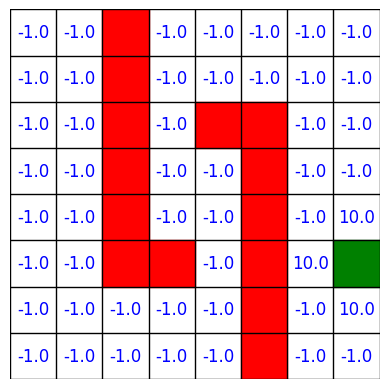

<Figure size 640x480 with 0 Axes>

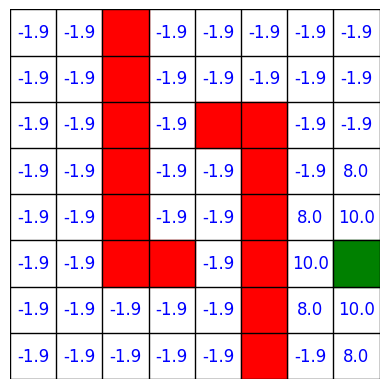

<Figure size 640x480 with 0 Axes>

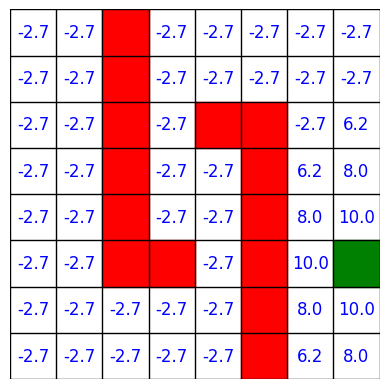

<Figure size 640x480 with 0 Axes>

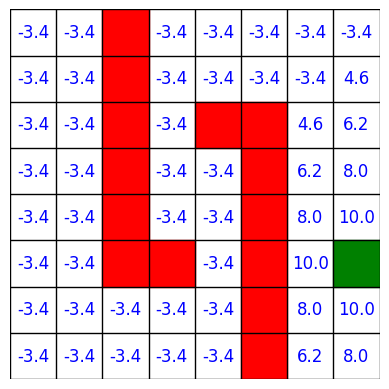

<Figure size 640x480 with 0 Axes>

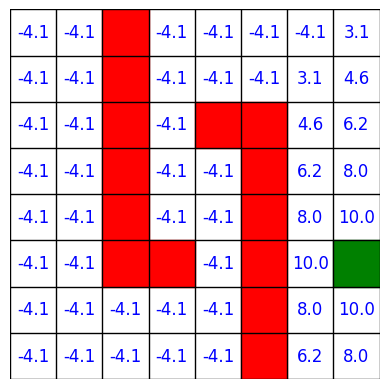

<Figure size 640x480 with 0 Axes>

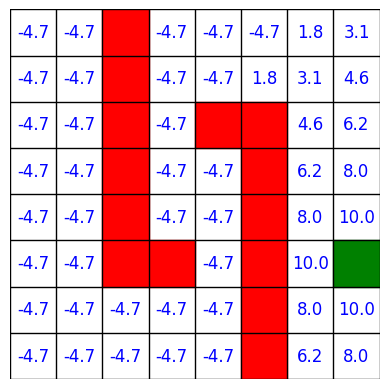

<Figure size 640x480 with 0 Axes>

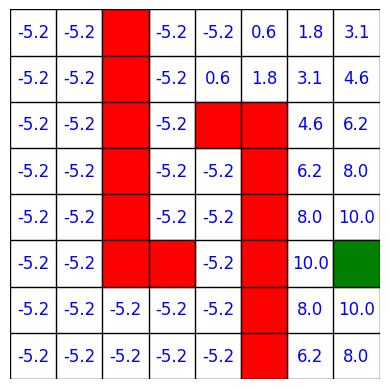

<Figure size 640x480 with 0 Axes>

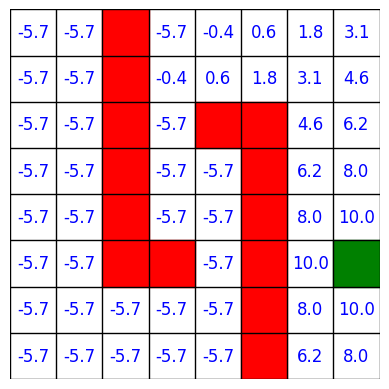

<Figure size 640x480 with 0 Axes>

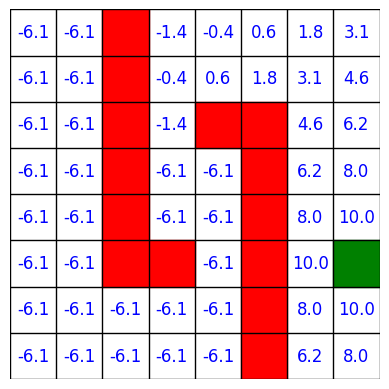

<Figure size 640x480 with 0 Axes>

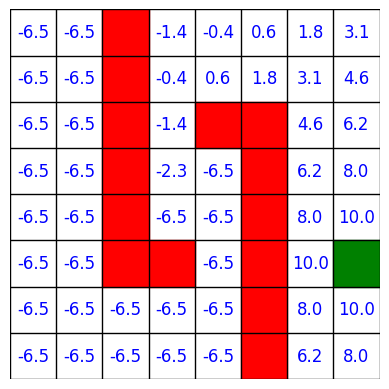

<Figure size 640x480 with 0 Axes>

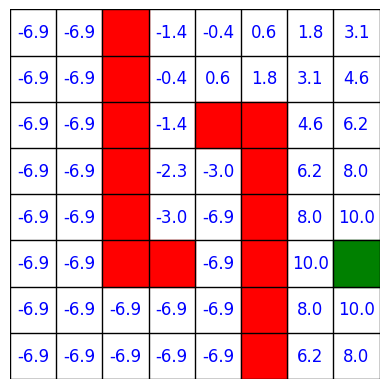

<Figure size 640x480 with 0 Axes>

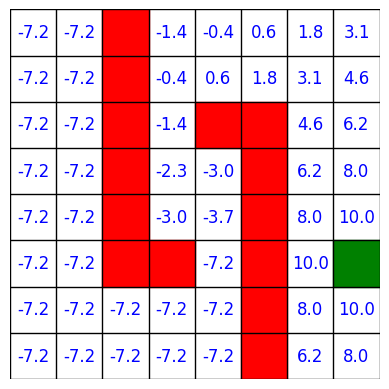

<Figure size 640x480 with 0 Axes>

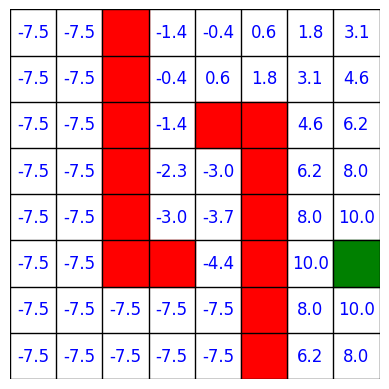

<Figure size 640x480 with 0 Axes>

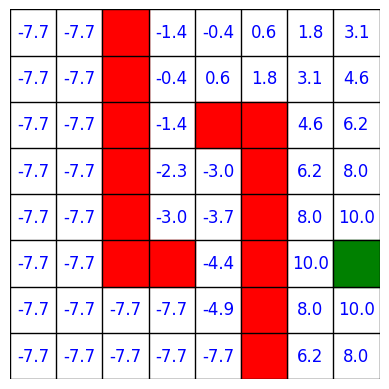

<Figure size 640x480 with 0 Axes>

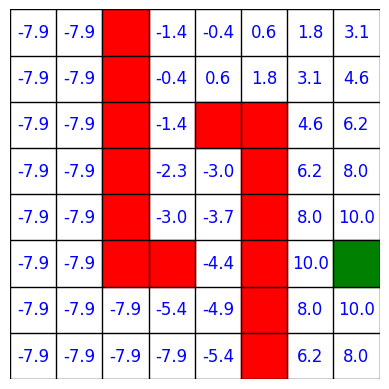

<Figure size 640x480 with 0 Axes>

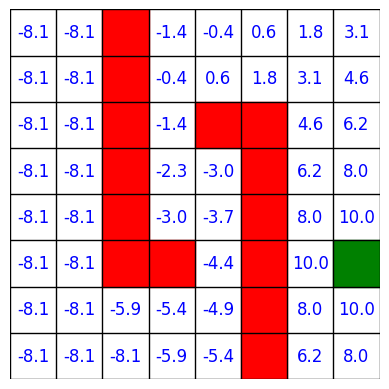

<Figure size 640x480 with 0 Axes>

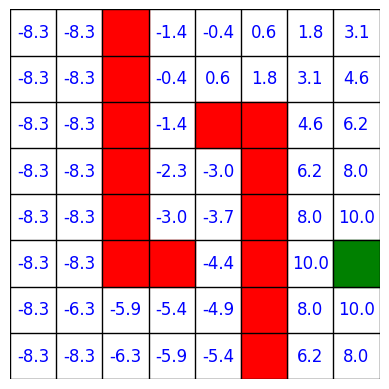

<Figure size 640x480 with 0 Axes>

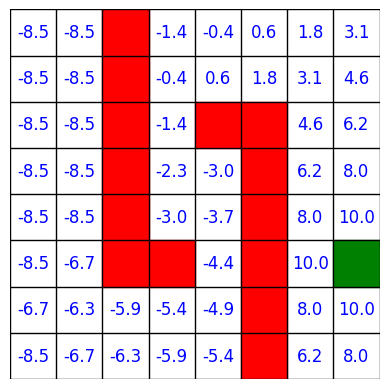

<Figure size 640x480 with 0 Axes>

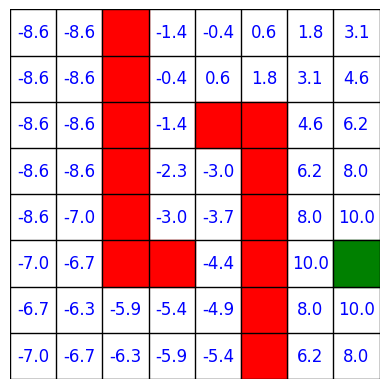

<Figure size 640x480 with 0 Axes>

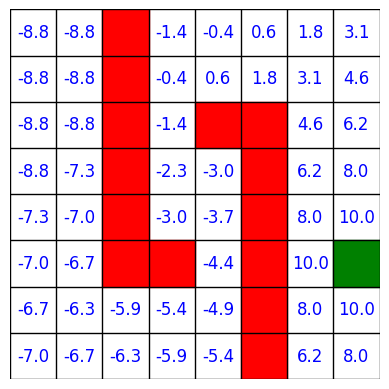

<Figure size 640x480 with 0 Axes>

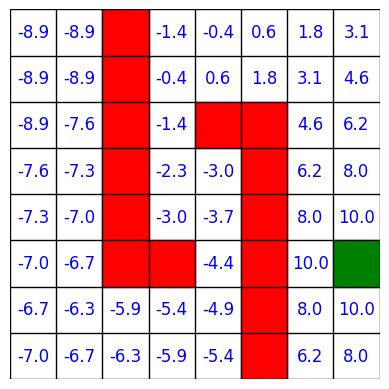

<Figure size 640x480 with 0 Axes>

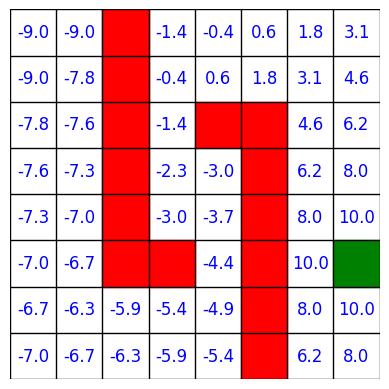

<Figure size 640x480 with 0 Axes>

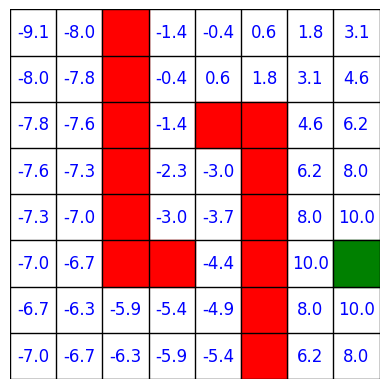

<Figure size 640x480 with 0 Axes>

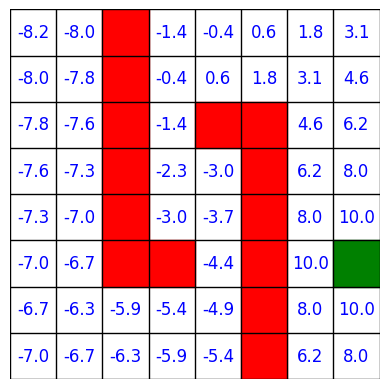

<Figure size 640x480 with 0 Axes>

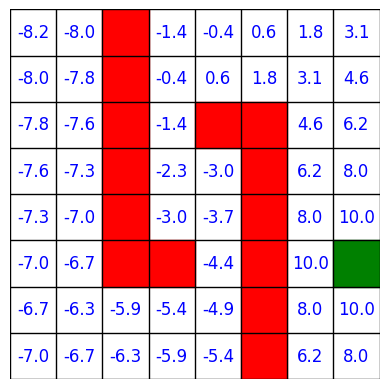

Optimal Value Function:
[[-8.22741238e+00 -8.03045820e+00 -9.99000000e+02 -1.39065580e+00
  -4.34062000e-01  6.28820000e-01  1.80980000e+00  3.12200000e+00]
 [-8.03045820e+00 -7.81162022e+00 -9.99000000e+02 -4.34062000e-01
   6.28820000e-01  1.80980000e+00  3.12200000e+00  4.58000000e+00]
 [-7.81162022e+00 -7.56846691e+00 -9.99000000e+02 -1.39065580e+00
  -9.99000000e+02 -9.99000000e+02  4.58000000e+00  6.20000000e+00]
 [-7.56846691e+00 -7.29829656e+00 -9.99000000e+02 -2.25159022e+00
  -3.02643120e+00 -9.99000000e+02  6.20000000e+00  8.00000000e+00]
 [-7.29829656e+00 -6.99810729e+00 -9.99000000e+02 -3.02643120e+00
  -3.72378808e+00 -9.99000000e+02  8.00000000e+00  1.00000000e+01]
 [-6.99810729e+00 -6.66456366e+00 -9.99000000e+02 -9.99000000e+02
  -4.35140927e+00 -9.99000000e+02  1.00000000e+01  0.00000000e+00]
 [-6.66456366e+00 -6.29395962e+00 -5.88217736e+00 -5.42464151e+00
  -4.91626834e+00 -9.99000000e+02  8.00000000e+00  1.00000000e+01]
 [-6.99810729e+00 -6.66456366e+00 -6.29395962

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time


class GridWorld:
    def __init__(self, rows, cols, start, goal, obstacles):
        self.rows = rows
        self.cols = cols
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.grid = np.full((rows, cols), -1)  # Default reward of -1 for all cells
        self.grid[goal] = 10  # Reward of +10 for the goal cell
        for obstacle in obstacles:
            self.grid[obstacle] = -999  # None represents an obstacle

    def is_valid_action(self, state, action):
        """Check if the action is valid from the given state."""
        row, col = state
        if action == "up" and row > 0 and self.grid[row - 1, col] != -999:
            return True
        elif action == "down" and row < self.rows - 1 and self.grid[row + 1, col] != -999:
            return True
        elif action == "left" and col > 0 and self.grid[row, col - 1] != -999:
            return True
        elif action == "right" and col < self.cols - 1 and self.grid[row, col + 1] != -999:
            return True
        return False

    def get_next_state(self, state, action):
        """Get the next state given the current state and action."""
        row, col = state
        if action == "up":
            return (row - 1, col)
        elif action == "down":
            return (row + 1, col)
        elif action == "left":
            return (row, col - 1)
        elif action == "right":
            return (row, col + 1)
        return state

    def plot_grid(self, values):
        # Plot the grid values
        fig, ax = plt.subplots()
        for i in range(rows):
            for j in range(cols):
                value = values[i, j]
                if value == -999:
                    ax.add_patch(matplotlib.patches.Rectangle((j, rows - i - 1), 1, 1, color="red"))  # Obstacles
                elif value == 0:
                    ax.add_patch(matplotlib.patches.Rectangle((j, rows - i - 1), 1, 1, color="green"))  # Obstacles
                else:
                    ax.text(j + 0.5, rows - i - 1 + 0.5, f"{value:.1f}",
                            ha="center", va="center", fontsize=12, color="blue")

        # Draw grid lines
        for x in range(cols + 1):
            ax.axvline(x, color='black', linewidth=1)
        for y in range(rows + 1):
            ax.axhline(y, color='black', linewidth=1)

        # Set axis limits and aspect ratio
        ax.set_xlim(0, cols)
        ax.set_ylim(0, rows)
        ax.set_aspect('equal')
        ax.axis('off')

        # Show the plot
        plt.show()
        # time.sleep(1)


    def value_iteration(self, discount_factor=0.9, theta=0.001):
        """Perform value iteration to compute optimal policy."""
        values = np.zeros((self.rows, self.cols))  # Initialize value function to zeros
        actions = ["up", "down", "left", "right"]
        
        while True:
            delta = 0
            new_values = np.copy(values)
            
            for row in range(self.rows):
                for col in range(self.cols):
                    if (row, col) in self.obstacles:
                        new_values[row][col]=-999
                        continue
                    if (row,col)==self.goal:
                        continue
                    max_value = float('-inf')
                    for action in actions:
                        if not self.is_valid_action((row, col), action):
                            continue
                        
                        next_state = self.get_next_state((row, col), action)
                        reward = self.grid[next_state]
                        max_value = max(max_value, reward + discount_factor * values[next_state])
                    
                    new_values[row][col] = max_value
                    delta = max(delta, abs(new_values[row][col] - values[row][col]))
            
            values = new_values
            # Plot the grid values after each iteration and see how it changes

            self.plot_grid(values)
            
            
            if delta < theta:  # Stop when values converge
                break
        
        return values

# Define grid world parameters
rows = 8
cols = 8
start = (4, 3)
goal = (5, 7)
obstacles = [(0, 2),(1, 2),(2, 2),(3, 2),(4, 2),(5, 2), 
            (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5),
             (5,3), 
             (2,4),]

# Create grid world instance
grid_world = GridWorld(rows=rows, cols=cols, start=start, goal=goal, obstacles=obstacles)

# Perform value iteration
optimal_values = grid_world.value_iteration()

# Print results
print("Optimal Value Function:")
print(optimal_values)


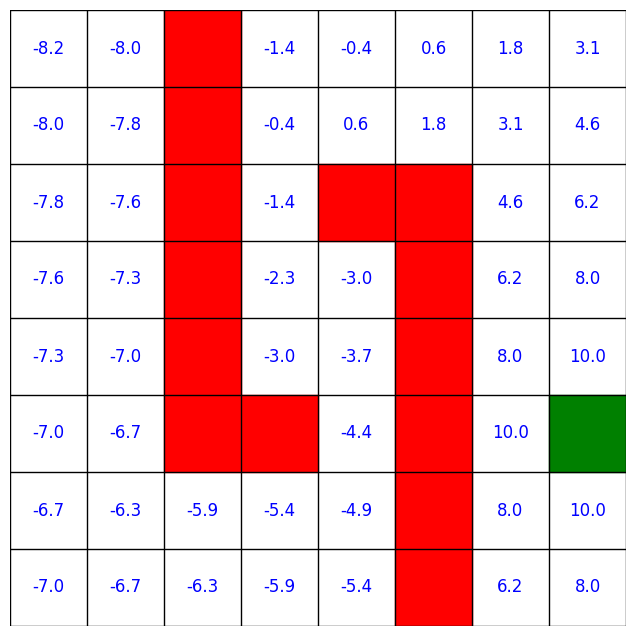

In [11]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the grid values
for i in range(rows):
    for j in range(cols):
        value = optimal_values[i, j]
        if value == -999:
            ax.add_patch(matplotlib.patches.Rectangle((j, rows - i - 1), 1, 1, color="red"))  # Obstacles
        elif value == 0:
            ax.add_patch(matplotlib.patches.Rectangle((j, rows - i - 1), 1, 1, color="green"))  # Obstacles
        else:
            ax.text(j + 0.5, rows - i - 1 + 0.5, f"{value:.1f}",
                    ha="center", va="center", fontsize=12, color="blue")

# Draw grid lines
for x in range(cols + 1):
    ax.axvline(x, color='black', linewidth=1)
for y in range(rows + 1):
    ax.axhline(y, color='black', linewidth=1)

# Set axis limits and aspect ratio
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.set_aspect('equal')
ax.axis('off')

# Show the plot
plt.show()